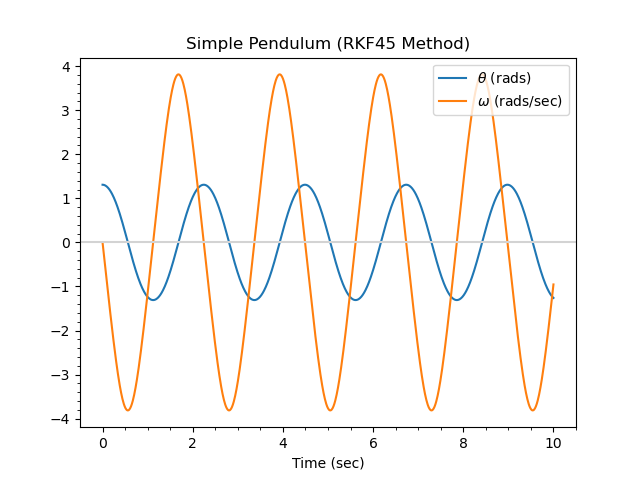

In [3]:
# rkf45_simple_pendulum.ipynb

# Cell 1

%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import AutoMinorLocator
from scipy.integrate import solve_ivp


def model(time, state_vector, phase_constant):
    omega, theta = state_vector
    d_omega = -phase_constant * np.sin(theta)
    d_theta = omega
    # Values must be returned here and then called later in the same order
    return d_omega, d_theta


def plot(ax):
    # Precalculate phase constant
    pendulum_length = 1.0  # meters
    phase_constant = 9.81 / pendulum_length

    # Set initial conditions
    omega_initial = 0
    theta_initial = np.radians(75)  # 75 degrees

    # Set model duration (seconds)
    time_initial = 0
    time_final = 10

    # Invoke Scipy Inital Value Problem (ivp) Solver
    sol = solve_ivp(
        model,
        (time_initial, time_final),
        [omega_initial, theta_initial],
        max_step=0.01,
        args=[phase_constant],
    )

    time_steps = sol.t
    # Extracting omega and theta 
    omega, theta = sol.y

    ax.plot(time_steps, theta, label=r"$\theta$ (rads)")
    ax.plot(time_steps, omega, label=r"$\omega$ (rads/sec)")

    ax.set_title("Simple Pendulum (RKF45 Method)")
    ax.set_xlabel("Time (sec)")
    ax.axhline(y=0.0, color="lightgray")
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.legend(loc="upper right")


def main():
    plt.close("all")
    fig = plt.figure(" ")
    gs = fig.add_gridspec(1, 1)
    ax = fig.add_subplot(gs[0, 0])
    plot(ax)
    plt.show()


main()